# Assumptions of linear models

In the material for this learning unit, we covered the following:

* Recap of linear regression
* Error and the true model
* Assumptions of linear models
* Addressing linear model limitations

In this practical, we'll explore the linear regression assumptions in more detail. The aim is to demonstrate points covered in the learning unit on real-world data, whilst focusing on the simple univariate case where we use a single input feature to predict an output variable.

# The dataset - linearity

We'll use a dataset of diabetes patients, which has ten features based on health measurements and one outcome variable of disease progression after one year.

The features are as follows:

| Feature 	| Description                           	|
|-----------|-------------------------------------------|
| `age`    	| Age in years                          	|
| `sex`    	| Sex                                   	|
| `bmi`    	| Body Mass Index                       	|
| `bp`     	| Average blood pressure                	|
| `tc`     	| T-Cells (a type of white blood cells) 	|
| `ldl`    	| low-density lipoproteins              	|
| `hdl`    	| high-density lipoproteins             	|
| `tch`    	| thyroid stimulating hormone           	|
| `ltg`    	| lamotrigine                           	|
| `glu`    	| blood sugar level                     	|

The data has already been pre-processed to standardise and normalise it all, to make it suitable for use in machine learning models.

But first, plot each of the ten values `['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']` against `progression` to see if it they meet the linearity requirement of a linear model.

Use seaborn's `pairplot` method to plot the ten `x_vars` against a single `y_vars` in one quick line. What do you see?

(If the plot seems small in your notebook, set the "height" argument to something around 4 or 5, then doubleclick on it to enlarge when it renders.)

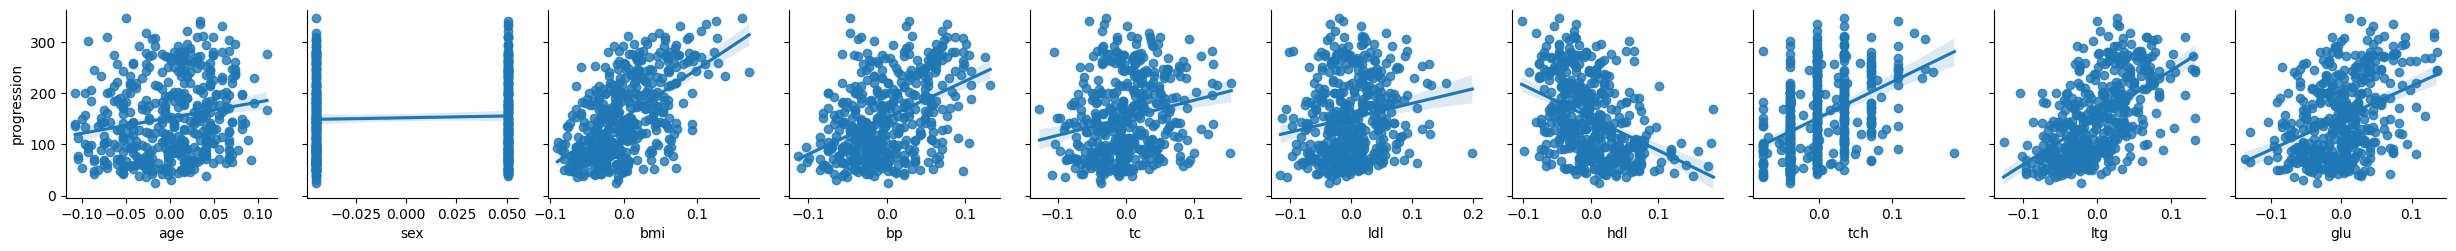

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/diabetes.csv')

# Your code here
sns.pairplot(x_vars = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'], y_vars = "progression", data = data, kind = "reg")

# The dataset - lack of multicollinearity

The assumption of a lack of multicollinearity requires there to be no strong correlation between any features (assuming you have more than one feature to predict $y$!)

We will only be modelling `progression` using a single feature at a time, so independence of the features isn't really a factor here. But let's look at it anyway.

Compute the correlation matrix of the dataset using the `.corr()` method. Remember, you only want to check the features against each other, not the target variable!

In [2]:
# Your code here
data.corr()


,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Using seaborn's `heatmap` function, visualise the matrix. Which features stand out?

<AxesSubplot: >

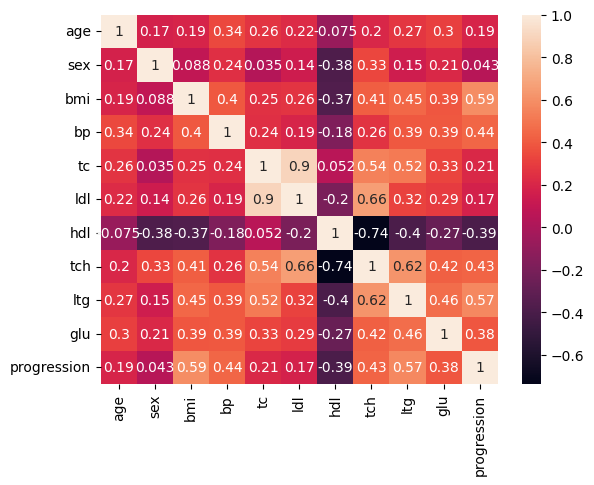

In [3]:
# Your code here
sns.heatmap(data.corr(), annot = True)

# Assumptions

Apart from linearity and a lack of multicollinearity, we looked at three other assumptions of the linear regression model:

* Homoscedasticity (Constant variance)
* Normality
* Independence

Let's look at the homoscedasticity and normality assumptions in more detail - what do they look like in practice and how can we detect them? Later on, when you are doing multivariate linear regression, you will use these techniques yourself. But first let's investigate them in our simple univariate case/

## The dataset - homoscedasticity and normality

To test these assumptions, we need a trained model. So first we will look at how to do this and test as we go.

# Training a linear regression model

This is easy to do with `sklearn`. The steps are:

1. Instantiate a model from `sklearn.linear_model.LinearRegression`
2. Use the `.fit()` method to train the model, by minimising the error against the true y values.
3. Access model parameters through `.coef_` and R2 score through `.score()`
4. Use the `.predict()` method on the trained model to get new predictions

An example is given below.

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = data['bmi']
x = x.values.reshape(-1, 1)
# When using a single feature in sklearn, it must be reshaped
# from the form [1,2,3,4] to [[1],[2],[3],[4]]

y = data['progression']

model.fit(x, y)

print(f"Weight for single feature (bmi): {model.coef_}")
print(f"R2 score for model: {model.score(x, y):.5f}")

unseen_x = [[0.2], [0.11], [0.8], [0.45]]

print("Predictions:", [i for i in model.predict(unseen_x)])

Weight for single feature (bmi): [949.43526053]
R2 score for model: 0.34392
Predictions: [342.020536258942, 256.57136281088816, 911.681692579301, 579.3793513924248]


Now, using the diabetes dataset, do the following for each of the ten features:

1. Instantiate and `.fit()` a LinearRegression model.
2. Print the R2 score.
3. Print a scatterplot of the residuals (predictions-truth) against the predictions to test for constant variance.
4. Perform a Shapiro-Wilk's test on the residuals (predictions-truth) to test for normality.

To access a single feature at a time, you can iterate through a list of the features and use it to index the dataframe by column.

(And because sklearn expects at least two features normally, don't forget to reshape the x values!)

In [7]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
# Use plt.show() after you make a graph to show it during a for loop
# Otherwise they all end up at the end of the output cell!

# Your code here
x_vars = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
for i in x_vars:
    x = data[i]
    x = x.values.reshape(-1, 1)
# When using a single feature in sklearn, it must be reshaped
# from the form [1,2,3,4] to [[1],[2],[3],[4]]

    y = data['progression']

    model.fit(x, y)

    print(f"R2 score for model: {model.score(x, y):.5f}")

    unseen_x = [[0.2], [0.11], [0.8], [0.45]]
    pred = model.predict(unseen_x)
    plt = sns.scatterplot(x = x, y = pred)
    plt.show()


    print("Predictions:", [i for i in model.predict(unseen_x)])
    #perform shapiro-wil test



R2 score for model: 0.03530


ValueError: Per-column arrays must each be 1-dimensional

How would you interpret these R2 scores and p-values for the S-W test?

In [ ]:
# Your code here


# Visualising simple linear regression

In general, visualising multivariate linear models with more than 3 features isn't possible. But in the univariate case, it's as simple as plotting a straight line, using the coefficient and bias term.

Alternatively, just use `lmplot()` from seaborn - it will plot the data, the line and show confidence intervals.

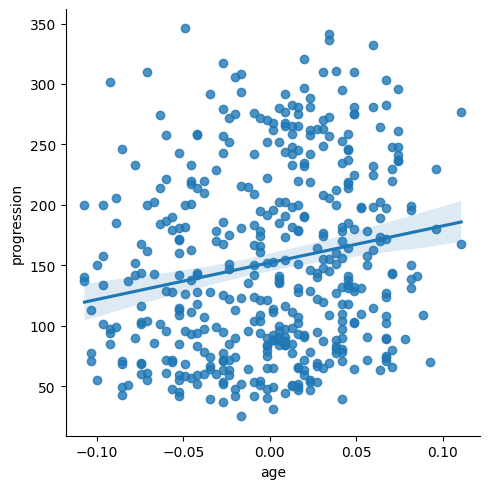

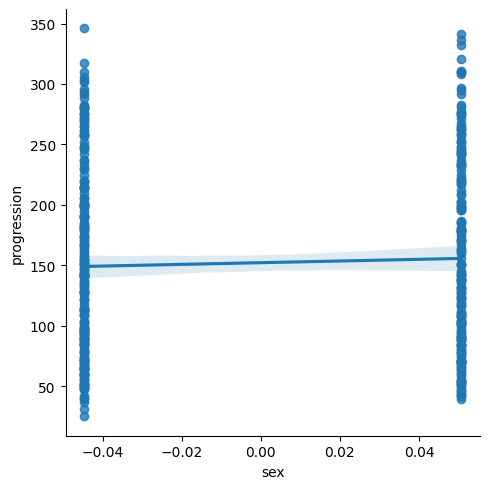

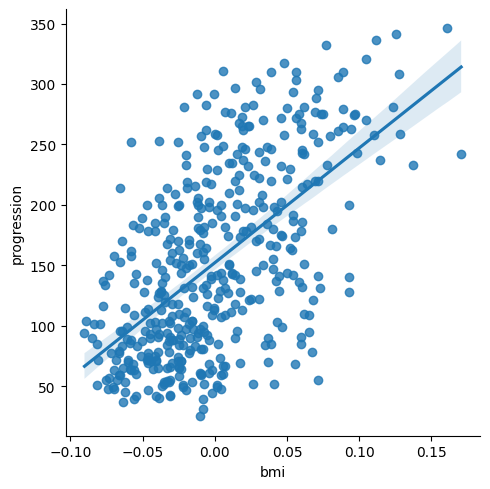

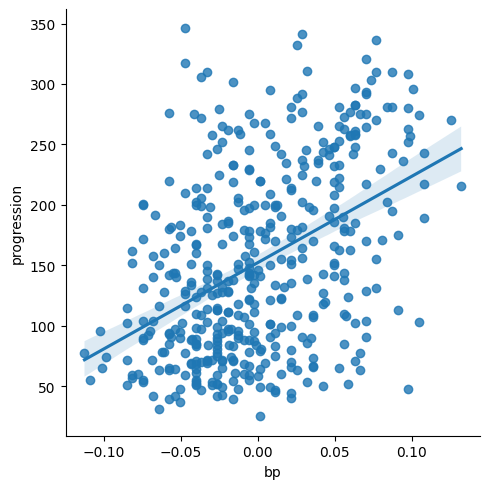

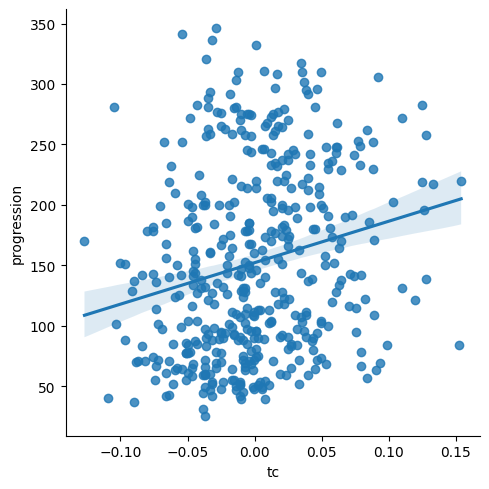

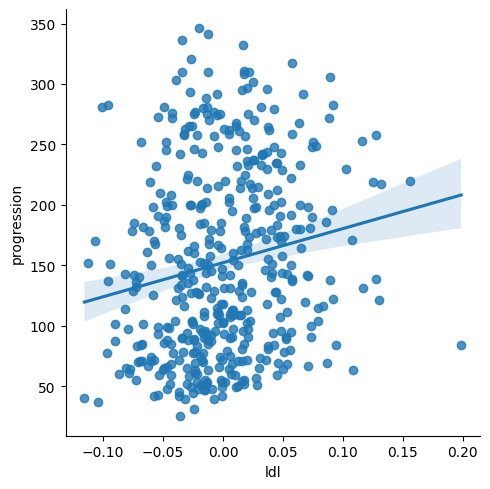

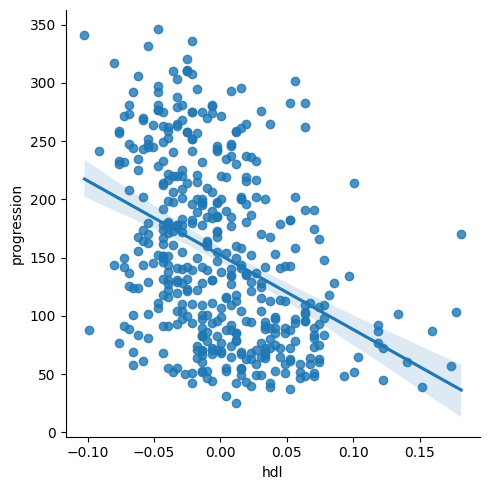

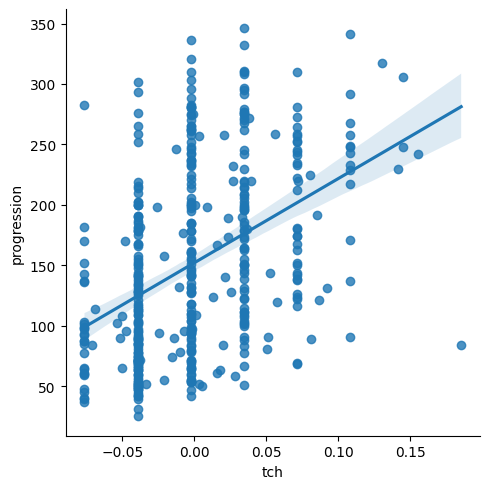

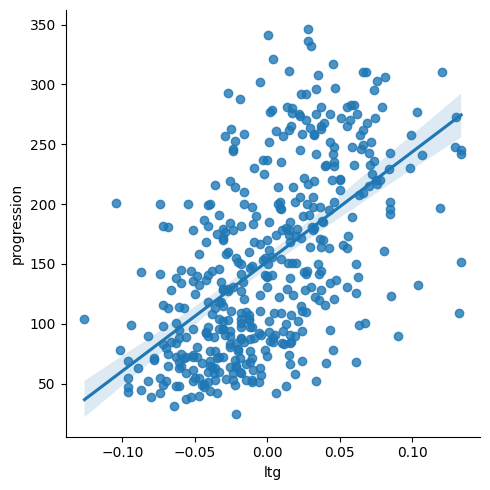

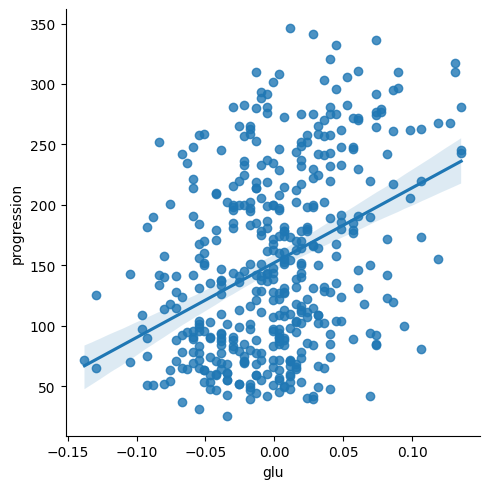

In [8]:
for feature in ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']:
    x = data[feature]
    x = x.values.reshape(-1, 1)
    y = data['progression']
    
    model = LinearRegression()
    model.fit(x, y)
    
    g = sns.lmplot(data=data, x=feature, y='progression');
    plt.show()

# Summary

Looking at the univariate case of linear regression, we focused on training a linear model to predict an output variable from a single input feature.

This isn't the most realistic (or exciting!) situation, but the goal was to introduce the core aspects and assumptions of the Linear Regression model. These become more important when working with linear models which use more features.